#Exercícios de Física Computacional
##Folha 6
1. Calcule Int π
0
sin(x) dx e
Int 2,5
0
e
x dx usando um método de Monte Carlo.


In [ ]:
N=400

def f1(x):
    return np.sin(x)

def f2(x):
    return np.exp(x)

def mmont_carlo(F,a,b,N):
    rd.seed()
    r=0
    h=(b-a)/N
    for i in range(1,N):
        x=b*rd.random()
        r+=F(x)
    return r*h

print('Pelo método de Monte-Carlo a solução do primeiro integral é: ',mmont_carlo(f1,0,np.pi,N))
print('Pelo método de Monte-Carlo a solução do segundo integral é: ',mmont_carlo(f2,0,2.5,N))

Pelo método de Monte-Carlo a solução do primeiro integral é:  2.0436065502539353
Pelo método de Monte-Carlo a solução do segundo integral é:  11.241389966851562


2. O movimento Browniano é um processo estocástico em que a posição em
função do tempo é dada por X(t + dt) = X(t) + N(0,(δ)
2dt;t, t + dt), sendo
δ uma constante e N(a, b;t0, t1) uma distribuição normal de valores aleatórios com média a e variância b em que os parâmetros t0 e t1 denotam
a independencia estatística de N em diferentes intervalos de tempo (i.e.
se [t0, t1] e [t2, t3] são intervalos de tempo dijuntos, então N(a, b;t0, t1) e
N(a, b;t2, t3) são independentes).

(a) Implemente uma função correspondente ao movimento Browniano
a uma dimensão (processo de Wiener) e represente diversas sequências temporais da posição.

Text(0.5, 1.0, 'Movimento Browniano 1D')

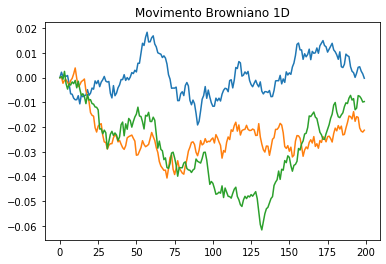

In [ ]:
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import random as rd

x1=0.0 #condição inicial
x2=0.0 #condição inicial
x3=0.0 #condição inicial
x_p1=[]
x_p2=[]
x_p3=[]
delta=0.5
dt=0.01
for i in range(0,200):
    x_p1.append(x1)
    x_p2.append(x2)
    x_p3.append(x3)
    x1+=np.random.normal(scale=delta**2*dt)
    x2+=np.random.normal(scale=delta**2*dt)
    x3+=np.random.normal(scale=delta**2*dt)

plt.plot(x_p1)
plt.plot(x_p2)
plt.plot(x_p3)
plt.title('Movimento Browniano 1D')

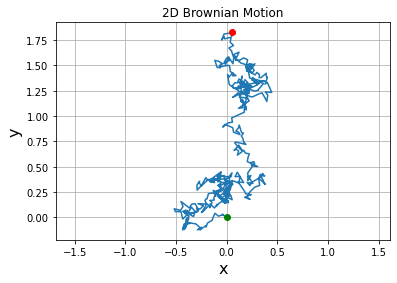

In [ ]:
import numpy
from pylab import plot, show, grid, xlabel, ylabel,subplot
from math import sqrt
from scipy.stats import norm
import numpy as np

def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

#Movimento Browniano 2D
import numpy
from pylab import plot, show, grid, axis, xlabel, ylabel, title

# The Wiener process parameter.
delta = 0.25
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Initial values of x.
x = numpy.empty((2,N+1))
x[:, 0] = 0.0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

# Plot the 2D trajectory.
plot(x[0],x[1])

# Mark the start and end points.
plot(x[0,0],x[1,0], 'go')
plot(x[0,-1], x[1,-1], 'ro')

# More plot decorations.
title('2D Brownian Motion')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
show()